In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
import numpy as np

In [5]:
GlobalTemp= pd.read_csv("GlobalTemperatures.csv")
print(data.shape)
data.head()

(3192, 9)


dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [4]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import datetime as dt
import plotly.express as px
import seaborn as sns

In [6]:
GlobalTemp.head(5)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [7]:
GlobalTemp.rename(columns = {'dt':'Date'}, inplace = True)

In [10]:
GlobalTemp["Date"]=pd.to_datetime(GlobalTemp["Date"])

In [11]:
Year_Temp = GlobalTemp.groupby(GlobalTemp['Date'].dt.year)['LandAverageTemperature','LandMaxTemperature',
                                                           'LandMinTemperature','LandAndOceanAverageTemperature'].mean().reset_index()
Year_Temp.rename(columns = {'Date':'Year'}, inplace = True)

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=Year_Temp.Year, y=Year_Temp.LandAverageTemperature,
                    mode='lines',
                    name='LandAvgTemp',
                    marker_color='#A9A9A9'))
fig.add_trace(go.Scatter(x=Year_Temp.Year, y=Year_Temp.LandMaxTemperature,
                    mode='lines',
                    name='LandMaxAvgTemp',
                    marker_color='#BDB76B'))
fig.add_trace(go.Scatter(x=Year_Temp.Year, y=Year_Temp.LandMinTemperature,
                    mode='lines',
                    name='LandMinAvgTemp',
                    marker_color='#45CE30'))

fig.add_trace(go.Scatter(x=Year_Temp.Year, y=Year_Temp.LandAndOceanAverageTemperature,
                    mode='lines',
                    name='Land&OceanAvgTemp',
                    marker_color='#FFA07A'))
fig.update_layout(
    height=800,
    xaxis_title="Years",
    yaxis_title='Temperatures in degree',
    title_text='Average Land, Ocean, Minimun, and Maximum Temperatures over the years'
)
fig.add_annotation(
            x=1950,
            y=2.7,
            text="1950")
fig.add_annotation(
            x=1972,
            y=8.4,
            text="1972")
fig.add_annotation(
            x=1978,
            y=14.28,
            text="1978")
fig.add_annotation(
            x=1969,
            y=15.31,
            text="1969")
fig.update_annotations(dict(
            xref="x",
            yref="y",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
))

fig.update_layout(showlegend=True)




fig.show()

Text(0, 0.5, 'Temperature')

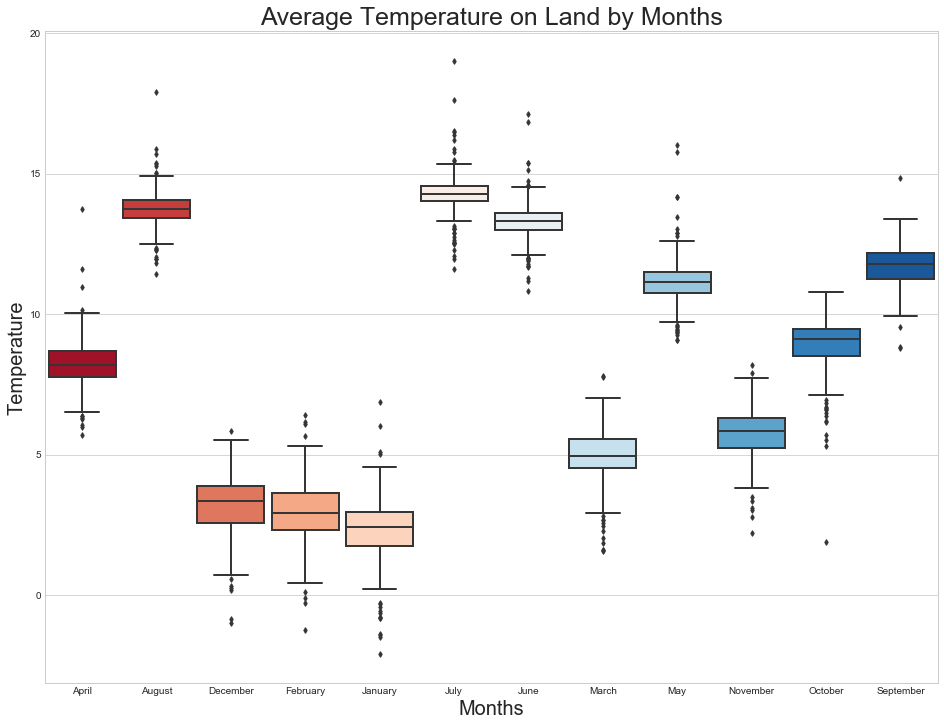

In [12]:
GlobalTemp["Year"] = pd.DatetimeIndex(GlobalTemp['Date']).year
GlobalTemp["Month"] = pd.DatetimeIndex(GlobalTemp['Date']).month
GlobalTemp['Month'] = GlobalTemp['Month'].astype(str) 
GlobalTemp.loc[GlobalTemp['Month']=='1','Month'] = 'January'
GlobalTemp.loc[GlobalTemp['Month']=='2','Month'] = 'February'
GlobalTemp.loc[GlobalTemp['Month']=='3','Month'] = 'March'
GlobalTemp.loc[GlobalTemp['Month']=='4','Month'] = 'April'
GlobalTemp.loc[GlobalTemp['Month']=='5','Month'] = 'May'
GlobalTemp.loc[GlobalTemp['Month']=='6','Month'] = 'June'
GlobalTemp.loc[GlobalTemp['Month']=='7','Month'] = 'July'
GlobalTemp.loc[GlobalTemp['Month']=='8','Month'] = 'August'
GlobalTemp.loc[GlobalTemp['Month']=='9','Month'] = 'September'
GlobalTemp.loc[GlobalTemp['Month']=='10','Month'] = 'October'
GlobalTemp.loc[GlobalTemp['Month']=='11','Month'] = 'November'
GlobalTemp.loc[GlobalTemp['Month']=='12','Month'] = 'December'
year_month = GlobalTemp.groupby(by = ['Year','Month']).mean().reset_index()
# Figure size
plt.figure(figsize=(16,12))

# The plot
sns.boxplot(x = 'Month', y = 'LandAverageTemperature', data = year_month, palette = "RdBu", saturation = 1, width = 0.9, fliersize=4, linewidth=2)

# Make pretty
plt.title('Average Temperature on Land by Months', fontsize = 25)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)


In [13]:
month_season = {
    "January": "Winter",
    "February": "Winter",
    "March": "Spring",
    "April": "Spring",
    "May": "Spring",
    "June": "Summer",
    "July": "Summer",
    "August": "Summer",
    "September": "Autumn",
    "October": "Autumn",
    "November": "Autumn",
    "December": "Winter"
}

GlobalTemp['Season'] = ''

for month, season in month_season.items():
    GlobalTemp.loc[GlobalTemp['Month'] == month, 'Season'] = season

year_season = GlobalTemp.groupby(by = ['Year','Season']).mean().reset_index()

Winter = year_season.loc[year_season['Season'] == 'Winter',:]
Spring = year_season.loc[year_season['Season'] == 'Spring',:]
Summer = year_season.loc[year_season['Season'] == 'Summer',:]
Autumn = year_season.loc[year_season['Season'] == 'Autumn',:]

fig2 = go.Figure()
for template in ["plotly_white"]:
    fig2.add_trace(go.Scatter(x=Winter['Year'], y=Winter['LandAverageTemperature'],
                    mode='lines',
                    name='Winter',
                    marker_color='#838B8B'))
    fig2.add_trace(go.Scatter(x=Spring['Year'], y=Spring['LandAverageTemperature'],
                    mode='lines',
                    name='Spring',
                    marker_color='#FFB5C5'))
    fig2.add_trace(go.Scatter(x=Summer['Year'], y=Summer['LandAverageTemperature'],
                    mode='lines',
                    name='Summer',
                    marker_color='#87CEFF'))
    fig2.add_trace(go.Scatter(x=Autumn['Year'], y=Autumn['LandAverageTemperature'],
                    mode='lines',
                    name='Autumn',
                    marker_color='#FF8000'))
    fig2.update_layout(
    height=800,
    xaxis_title="Years",
    yaxis_title='Temperature in degree',
    title_text='Average Temperature seasonwise over the years',
    template=template)




fig2.show()

In [14]:
data.isna().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [15]:
GlobalTemp["LandAverageTemperature"].fillna(GlobalTemp["LandAverageTemperature"].mean() , inplace=True)
GlobalTemp["LandAverageTemperatureUncertainty"].fillna(GlobalTemp["LandAverageTemperatureUncertainty"].mean() , inplace=True)

In [16]:
for i in range(1200):
    rand = np.random.uniform(-7,7)
    rnd = np.random.uniform(-2,2)
    GlobalTemp["LandMaxTemperature"].fillna((GlobalTemp["LandMaxTemperature"].sample(50).mean()+rand) , limit=1 , inplace=True)
    GlobalTemp["LandMinTemperature"].fillna((GlobalTemp["LandMinTemperature"].sample(50).mean()+rand) , limit=1 , inplace=True)
    GlobalTemp["LandAndOceanAverageTemperature"].fillna((GlobalTemp["LandAndOceanAverageTemperature"].sample(50).mean()+rnd) , limit=1 , inplace=True)

for i in range(1200):
    rand = np.random.uniform(0,3)
    rnd = np.random.uniform(0,0.23)
    GlobalTemp["LandMaxTemperatureUncertainty"].fillna((GlobalTemp["LandMaxTemperatureUncertainty"].sample(50).mean()+rand) , limit=1 , inplace=True)
    GlobalTemp["LandMinTemperatureUncertainty"].fillna((GlobalTemp["LandMinTemperatureUncertainty"].sample(50).mean()+rand) , limit=1 , inplace=True)
    GlobalTemp["LandAndOceanAverageTemperatureUncertainty"].fillna((GlobalTemp["LandAndOceanAverageTemperatureUncertainty"].sample(50).mean()+rnd) , limit=1 , inplace=True)

In [18]:
GlobalTemp.isna().sum()

Date                                         0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
Year                                         0
Month                                        0
Season                                       0
dtype: int64

In [19]:
data.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

In [ ]:
#### checking for outliers

Text(0.5, 1.0, 'LandAndOceanAverageTemperatureUncertainty')

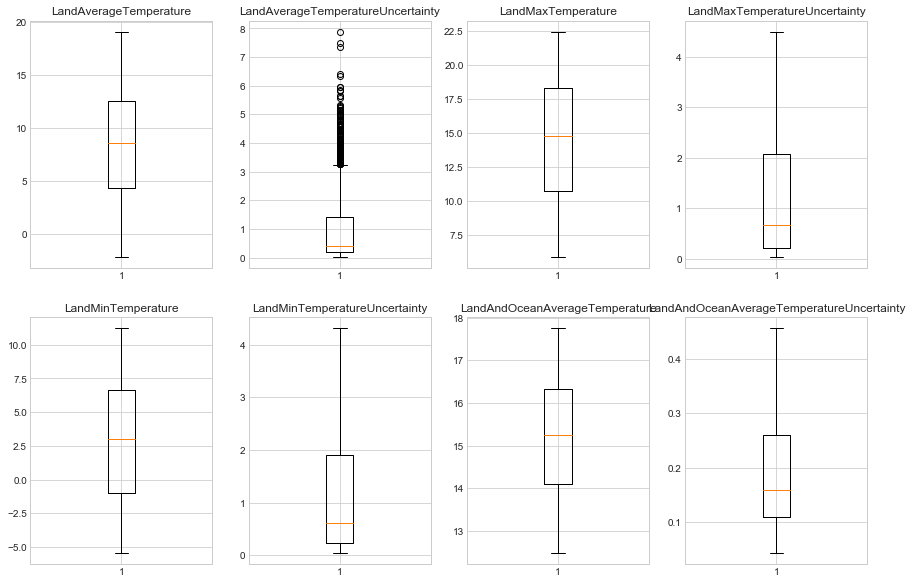

In [20]:
fig , ax = plt.subplots(2,4 , figsize = (15,10))
ax[0,0].boxplot(GlobalTemp['LandAverageTemperature'])
ax[0,0].set_title("LandAverageTemperature")

ax[0,1].boxplot(GlobalTemp['LandAverageTemperatureUncertainty'])
ax[0,1].set_title("LandAverageTemperatureUncertainty")

ax[0,2].boxplot(GlobalTemp['LandMaxTemperature'])
ax[0,2].set_title("LandMaxTemperature")

ax[0,3].boxplot(GlobalTemp['LandMaxTemperatureUncertainty'])
ax[0,3].set_title("LandMaxTemperatureUncertainty")

ax[1,0].boxplot(GlobalTemp['LandMinTemperature'])
ax[1,0].set_title("LandMinTemperature")

ax[1,1].boxplot(GlobalTemp['LandMinTemperatureUncertainty'])
ax[1,1].set_title("LandMinTemperatureUncertainty")

ax[1,2].boxplot(GlobalTemp['LandAndOceanAverageTemperature'])
ax[1,2].set_title("LandAndOceanAverageTemperature")

ax[1,3].boxplot(GlobalTemp['LandAndOceanAverageTemperatureUncertainty'])
ax[1,3].set_title("LandAndOceanAverageTemperatureUncertainty")


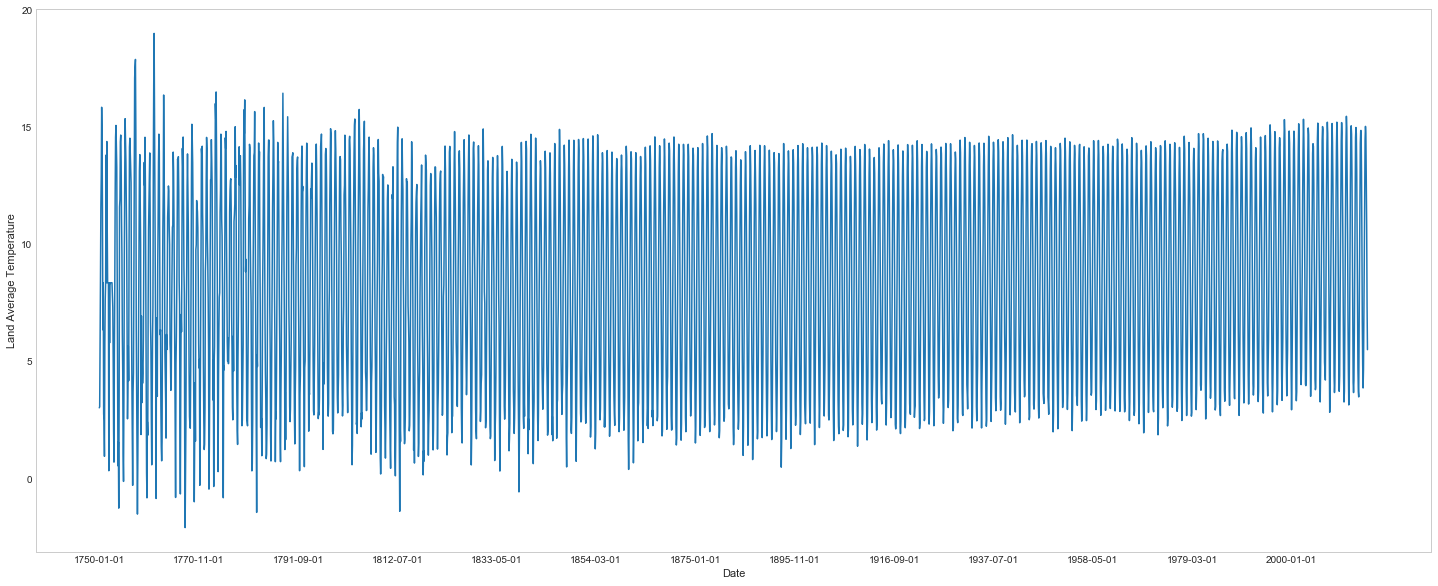

In [21]:
fig , ax =plt.subplots(figsize=(25,10))
ax.plot(data["dt"] , GlobalTemp['LandAverageTemperature'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Land Average Temperature', fontsize='11')
plt.grid()
plt.show()

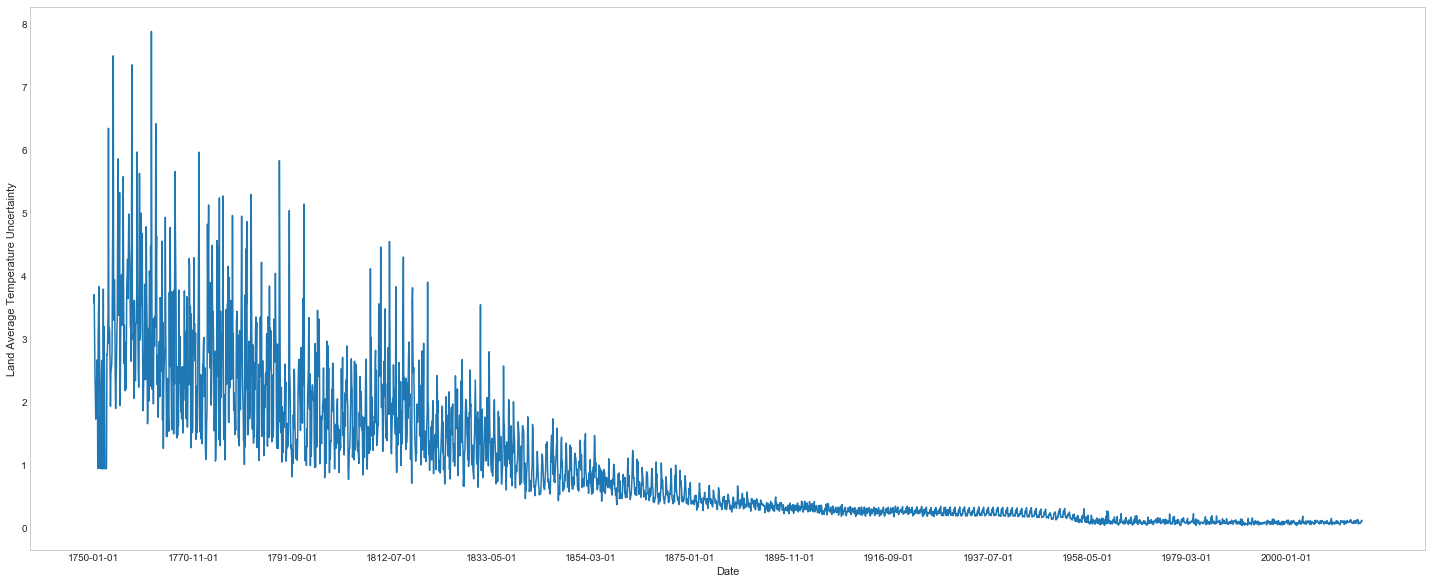

In [22]:
fig , ax =plt.subplots(figsize=(25,10))
ax.plot(data["dt"] , GlobalTemp['LandAverageTemperatureUncertainty'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Land Average Temperature Uncertainty', fontsize='11')
plt.grid()
plt.show()

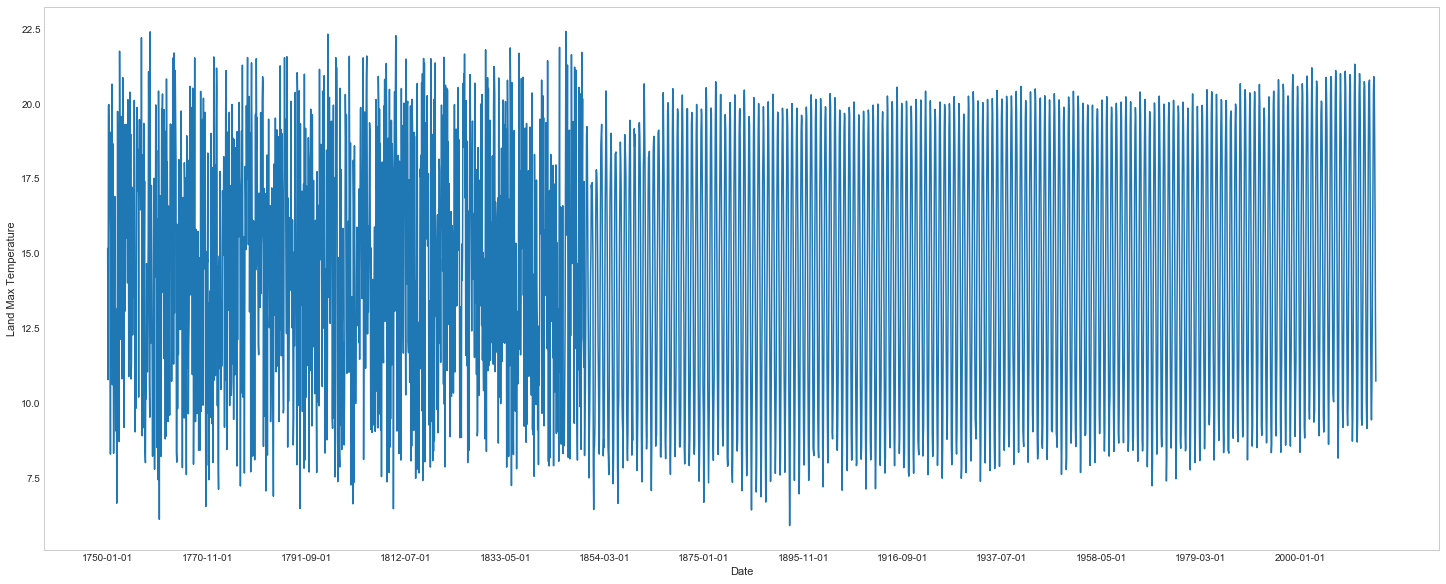

In [23]:
fig , ax =plt.subplots(figsize=(25,10))
ax.plot(data["dt"] , GlobalTemp['LandMaxTemperature'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Land Max Temperature', fontsize='11')
plt.grid()
plt.show()

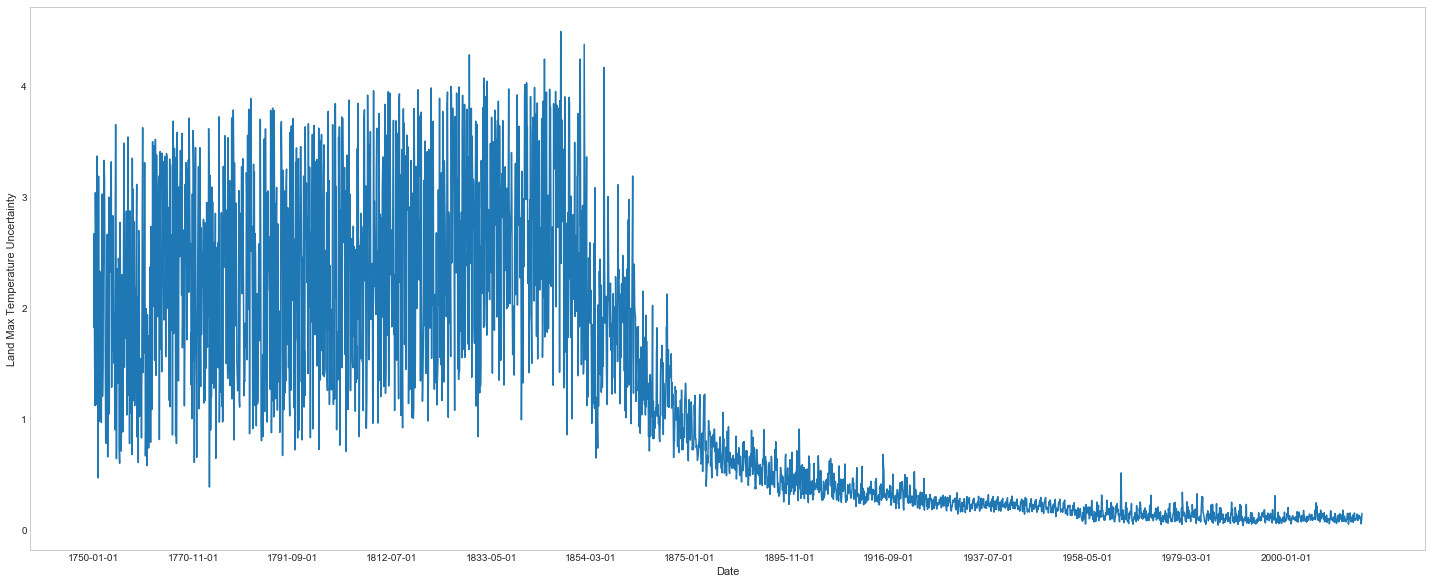

In [24]:
fig , ax =plt.subplots(figsize=(25,10))
ax.plot(data["dt"] , GlobalTemp['LandMaxTemperatureUncertainty'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Land Max Temperature Uncertainty', fontsize='11')
plt.grid()
plt.show()

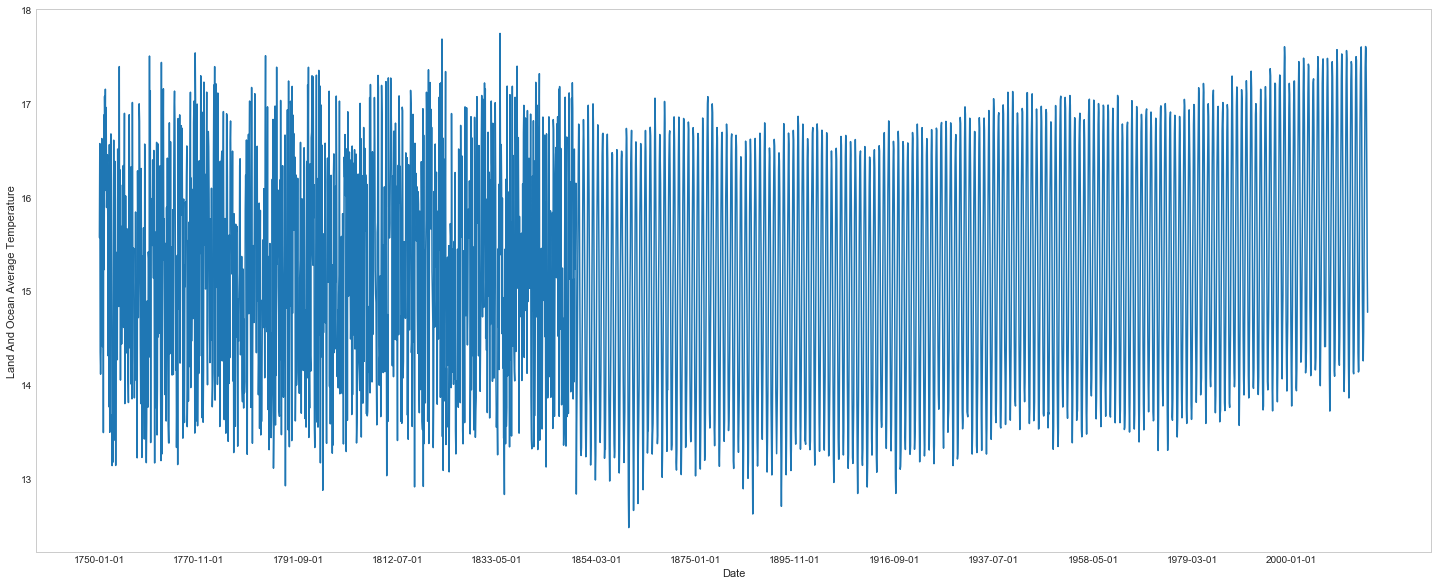

In [25]:
fig , ax =plt.subplots(figsize=(25,10))
ax.plot(data["dt"] , GlobalTemp['LandAndOceanAverageTemperature'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Land And Ocean Average Temperature', fontsize='11')
plt.grid()
plt.show()

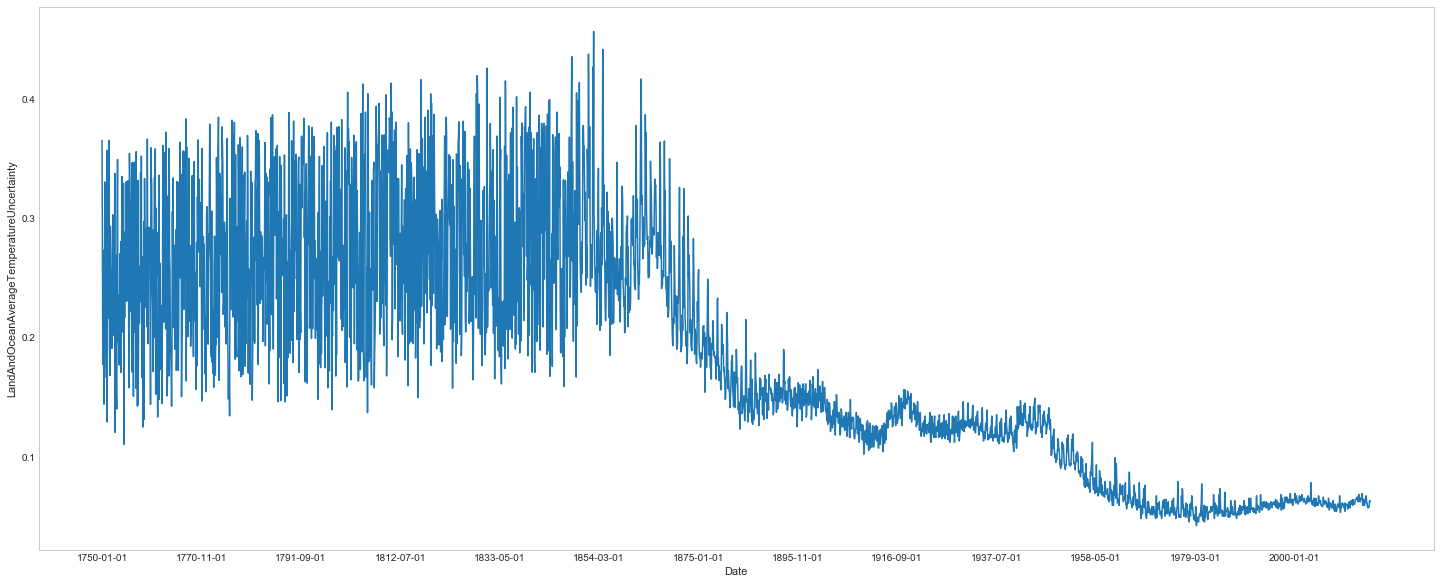

In [26]:
fig , ax =plt.subplots(figsize=(25,10))
ax.plot(data["dt"] , GlobalTemp['LandAndOceanAverageTemperatureUncertainty'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('LandAndOceanAverageTemperatureUncertainty', fontsize='11')
plt.grid()
plt.show()

In [27]:
print(GlobalTemp.Date.min())

1750-01-01 00:00:00


In [28]:
print(GlobalTemp.Date.max())

2015-12-01 00:00:00


In [32]:
statetemp=pd.read_csv("GlobalLandTemperaturesByState.csv")

In [33]:
statetemp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [35]:
statetemp.shape

(645675, 5)

In [36]:
statetemp.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [38]:
statetemp.describe()

AverageTemperature  AverageTemperatureUncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%             19.899000                       1.850000
max             36.339000                      12.646000

In [40]:
statetemp["AverageTemperature"].fillna(statetemp["AverageTemperatureUncertainty"].median())

0         25.544
1         24.228
2         24.371
3         25.427
4         25.675
5         25.442
6         25.400
7         24.100
8         25.814
9         24.658
10        24.659
11        24.907
12        24.418
13        24.930
14         0.656
15        24.615
16        25.150
17        25.196
18        25.441
19        25.362
20         0.656
21         0.656
22         0.656
23         0.656
24         0.656
25         0.656
26         0.656
27         0.656
28         0.656
29         0.656
           ...  
645645    16.553
645646    20.889
645647    24.815
645648    28.602
645649    27.581
645650    23.775
645651    18.408
645652    16.032
645653     6.849
645654     4.910
645655     5.523
645656    10.819
645657    17.977
645658    21.280
645659    24.020
645660    28.732
645661    27.704
645662    23.024
645663    18.864
645664    12.306
645665     6.633
645666     5.120
645667     7.867
645668    12.116
645669    15.710
645670    21.634
645671    24.679
645672    29.2

In [41]:
statetemp["AverageTemperatureUncertainty"].fillna(statetemp["AverageTemperatureUncertainty"].median())

0         1.171
1         1.103
2         1.044
3         1.073
4         1.014
5         1.179
6         1.064
7         1.718
8         1.159
9         1.147
10        1.547
11        1.186
12        1.168
13        1.355
14        0.656
15        1.053
16        1.093
17        1.048
18        1.102
19        1.382
20        0.656
21        0.656
22        0.656
23        0.656
24        0.656
25        0.656
26        0.656
27        0.656
28        0.656
29        0.656
          ...  
645645    0.186
645646    0.301
645647    0.405
645648    0.397
645649    0.218
645650    0.105
645651    0.196
645652    0.296
645653    0.325
645654    0.324
645655    0.332
645656    0.305
645657    0.386
645658    0.217
645659    0.509
645660    0.400
645661    0.205
645662    0.289
645663    0.412
645664    0.300
645665    0.437
645666    0.393
645667    0.490
645668    0.345
645669    0.461
645670    0.578
645671    0.596
645672    1.340
645673    0.869
645674    0.656
Name: AverageTemperature

In [49]:
statetemp['dt'] = pd.to_datetime(statetemp['dt'])
statetemp.set_index('dt',inplace = True)
statetemp.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-01-12', '2013-01-01', '2013-01-02', '2013-01-03',
               '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
               '2013-01-08', '2013-01-09'],
              dtype='datetime64[ns]', name='dt', length=645675, freq=None)

In [45]:
statetemp.describe()

AverageTemperature  AverageTemperatureUncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%             19.899000                       1.850000
max             36.339000                      12.646000

In [50]:
statetemp['year']= statetemp.index.year
statetemp.head()

AverageTemperature  AverageTemperatureUncertainty State Country  \
dt                                                                            
1855-05-01              25.544                          1.171  Acre  Brazil   
1855-06-01              24.228                          1.103  Acre  Brazil   
1855-07-01              24.371                          1.044  Acre  Brazil   
1855-08-01              25.427                          1.073  Acre  Brazil   
1855-09-01              25.675                          1.014  Acre  Brazil   

            year  
dt                
1855-05-01  1855  
1855-06-01  1855  
1855-07-01  1855  
1855-08-01  1855  
1855-09-01  1855

In [51]:
latest_statetemp = statetemp.loc['1980':'2021']
latest_statetemp.head()

AverageTemperature  AverageTemperatureUncertainty State Country  \
dt                                                                            
1980-01-01              26.652                          0.190  Acre  Brazil   
1980-01-02              26.495                          0.495  Acre  Brazil   
1980-01-03              26.270                          0.236  Acre  Brazil   
1980-01-04              26.430                          0.201  Acre  Brazil   
1980-01-05              25.802                          0.882  Acre  Brazil   

            year  
dt                
1980-01-01  1980  
1980-01-02  1980  
1980-01-03  1980  
1980-01-04  1980  
1980-01-05  1980

In [52]:
latest_statetemp[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')

AverageTemperature
Country                          
Canada                  -0.681256
Russia                   2.432833
United States           11.516373
China                   12.150210
Australia               18.447621
India                   22.871669
Brazil                  24.537580

In [54]:
resample_statetemp = latest_statetemp[['AverageTemperature']].resample('A').mean()
resample_statetemp.head()

AverageTemperature
dt                            
1980-12-31            9.689856
1981-12-31           10.366578
1982-12-31            9.837958
1983-12-31           10.259516
1984-12-31            9.724950

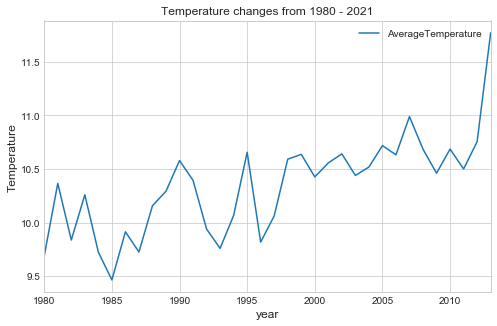

In [55]:
resample_statetemp.plot(title='Temperature changes from 1980 - 2021',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('year',fontsize=12)
plt.show()

In [63]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results')
test_statetemp = adfuller(resample_statetemp.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_statetemp[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])
for key,value in test_df[4].items():
    df_output['Critical value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results
Test Statistic                -0.728209
p-value                        0.839307
Lags Used                      2.000000
Number of Observation Used    31.000000
Critical value (1%)           -3.661429
Critical value (5%)           -2.960525
Critical value (10%)          -2.619319
dtype: float64


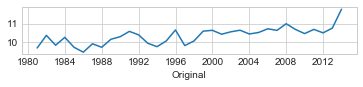

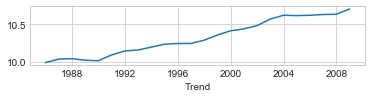

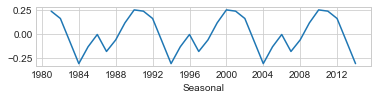

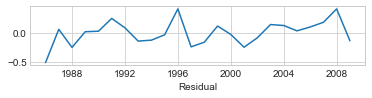

<Figure size 432x360 with 0 Axes>

In [60]:
decomp= seasonal_decompose(resample_statetemp,freq=10)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(resample_statetemp)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()


In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
print(statetemp.year .min())

1743


In [68]:
statetemp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 645675 entries, 1855-05-01 to 2013-01-09
Data columns (total 5 columns):
AverageTemperature               620027 non-null float64
AverageTemperatureUncertainty    620027 non-null float64
State                            645675 non-null object
Country                          645675 non-null object
year                             645675 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 49.6+ MB


In [70]:
statetemp.Country.unique()

array(['Brazil', 'Russia', 'United States', 'Canada', 'India', 'China',
       'Australia'], dtype=object)

In [71]:
statetemp.Country.nunique()

7

In [72]:
country_temp_asc = statetemp.groupby(by=['Country']).mean().reset_index().sort_values('AverageTemperature',ascending=False).reset_index(drop=True)
country_temp_asc
plt.figure(figsize=(20,10))

fig5 = px.bar(country_temp_asc, x='Country', y='AverageTemperature',color='AverageTemperature')

fig5.update_layout(
        title="Average Temperature of Countries Over 270 Years ",
        xaxis_title="Years",
        yaxis_title="Average Temperature",
        font=dict(
            family="Courier New",
            size=18,
            color="black"
        )
    )
fig5.show()

<Figure size 1440x720 with 0 Axes>

In [73]:
country_state_temp = statetemp.groupby(by = ['Country','State']).mean().reset_index().sort_values('AverageTemperature',ascending=False).reset_index()
country_state_temp
country_state_temp["world"] = "world" # in order to have a single root node
fig6 = px.treemap(country_state_temp.head(200), path=['world', 'Country','State'], values='AverageTemperature',
                  color='State',color_continuous_scale='RdBu')
fig6.show()

In [78]:
statetemp.rename(columns = {'dt':'Date'}, inplace = True)